# Term 1 and 2 Project

Facebook dataset having 99K lines of rows having different column names.

### Initial steps:

##### 1) Load packages to Jupyter note book.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
%matplotlib inline

sns.set()

from subprocess import check_output


#### 2) Load dataset into dataframe

In [2]:
fb_df=pd.read_csv("rawdata/facebook_data.csv")

#### 3) Display datafrom dataFrame object

In [3]:
fb_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


#### 4) Display list of columns and datatypes

In [4]:
fb_df.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

In [5]:
fb_df.info()      #display no.of values each feild holding.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [6]:
fb_df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [7]:
fb_df.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [8]:
fb_df.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

### DOB fields into single date field

In [9]:
fb_df['dateofbirth'] = fb_df[fb_df.columns[2:5]].apply(
lambda x: '-'.join(x.astype(int).astype(str)), axis=1
)

fb_df.head()
#fb_df[fb_df.columns[2:5]].head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,dateofbirth
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,19-1999-11
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,2-1999-11
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,16-1999-11
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,25-1999-12
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,4-1999-12


In [10]:
from datetime import datetime

fb_df['dob']=fb_df['dateofbirth'].apply(
lambda x: (datetime.strptime(x,'%d-%Y-%m'))
)  

#fb_df['dateofbirth']=pd.to_datetime(fb_df['dateofbirth'])
fb_df.dtypes


userid                            int64
age                               int64
dob_day                           int64
dob_year                          int64
dob_month                         int64
gender                           object
tenure                          float64
friend_count                      int64
friendships_initiated             int64
likes                             int64
likes_received                    int64
mobile_likes                      int64
mobile_likes_received             int64
www_likes                         int64
www_likes_received                int64
dateofbirth                      object
dob                      datetime64[ns]
dtype: object

In [11]:
fb_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,dateofbirth,dob
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,19-1999-11,1999-11-19
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,2-1999-11,1999-11-02
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,16-1999-11,1999-11-16
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,25-1999-12,1999-12-25
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,4-1999-12,1999-12-04


In [12]:
fb_cleandf=fb_df
fb_cleandf.drop(columns=['dateofbirth','dob_day','dob_month','dob_year'], inplace=True)
fb_cleandf.head()

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,dob
0,2094382,14,male,266.0,0,0,0,0,0,0,0,0,1999-11-19
1,1192601,14,female,6.0,0,0,0,0,0,0,0,0,1999-11-02
2,2083884,14,male,13.0,0,0,0,0,0,0,0,0,1999-11-16
3,1203168,14,female,93.0,0,0,0,0,0,0,0,0,1999-12-25
4,1733186,14,male,82.0,0,0,0,0,0,0,0,0,1999-12-04


### Pre profilling for facebook dataset.

In [13]:
fb_profile=fb_df.profile_report(title="Facebook User Report")
fb_profile.to_file(output_file="rawdata\Facebook_PredataProfiling_Report.html")

#### Get counts for gender distribution

In [14]:
pd.isnull(fb_cleandf['gender']).sum()

175

In [15]:
fb_cleandf['gender'].value_counts()

male      58574
female    40254
Name: gender, dtype: int64

In [16]:
fb_cleandf[fb_cleandf.isnull().any(axis=1)]

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,dob
3224,1781137,25,NaN,203.0,1,1,1,0,1,0,0,0,1988-01-03
4123,1110111,31,NaN,227.0,2,2,0,0,0,0,0,0,1982-01-12
5920,2000185,25,NaN,239.0,4,4,0,0,0,0,0,0,1988-02-15
6432,1137054,59,NaN,2076.0,4,0,23,5,23,4,0,1,1954-02-18
6870,1783336,62,NaN,2047.0,5,0,0,1,0,1,0,0,1951-09-05
6886,1280036,67,NaN,2056.0,5,2,0,0,0,0,0,0,1946-07-02
7130,2185523,108,NaN,1517.0,5,2,6,15,0,4,6,11,1905-06-06
7242,1117499,90,NaN,1960.0,5,4,33,12,2,0,31,12,1923-11-02
7555,1098347,27,NaN,1150.0,7,2,0,0,0,0,0,0,1986-04-19
10093,1020617,85,NaN,2222.0,9,1,1,1,0,0,1,1,1928-08-07


#### Filling missed gender field values with "Not specified" value

In [17]:
fb_cleandf['gender']=fb_cleandf['gender'].fillna('Not specified')

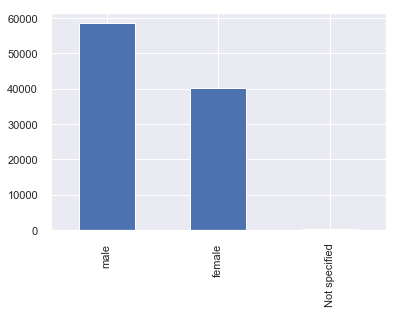

In [29]:
import matplotlib as plot
fb_cleandf['gender'].value_counts().plot.bar()

#### Filling missed tenure field values (2 records) with total mean value

In [19]:
pd.isnull(fb_cleandf['tenure']).sum()

2

In [20]:
fb_cleandf['tenure']= fb_cleandf['tenure'].fillna(int(fb_cleandf['tenure'].mean()))
#int(fb_cleandf['tenure'].mean())

In [21]:
pd.isnull(fb_cleandf['tenure']).sum()  #Varify null count

0

### Post profilling for facebook dataset.

In [22]:
fb_profile=fb_df.profile_report(title="Facebook User Report")
fb_profile.to_file(output_file="rawdata\Facebook_PostdataProfiling_Report.html")

### Grouping data and finding insights from it.

In [23]:
fb_cleandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 13 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
gender                   99003 non-null object
tenure                   99003 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dob                      99003 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(10), object(1)
memory usage: 9.8+ MB


In [24]:
#set userid as index of data frame

fb_cleandf.set_index('userid', inplace=True)
fb_cleandf.head(5)

,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,dob
userid,,,,,,,,,,,,
2094382,14,male,266.0,0,0,0,0,0,0,0,0,1999-11-19
1192601,14,female,6.0,0,0,0,0,0,0,0,0,1999-11-02
2083884,14,male,13.0,0,0,0,0,0,0,0,0,1999-11-16
1203168,14,female,93.0,0,0,0,0,0,0,0,0,1999-12-25
1733186,14,male,82.0,0,0,0,0,0,0,0,0,1999-12-04


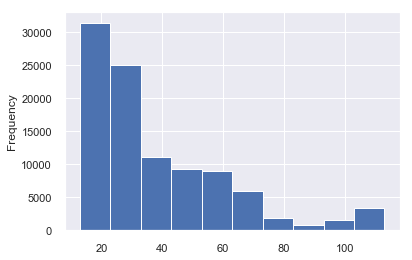

In [25]:
fb_cleandf['age'].plot.hist()

From Histogram plot we can say "most of the users are in 10-30 age range.<br/>
- we can say young generation are more active in social media.

### Questions

### Which age range people having high likes?

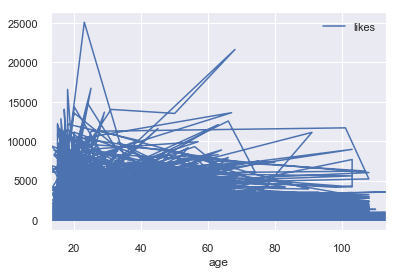

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fb_cleandf.plot(x = 'age', y = 'likes', ax = ax)


#fb_cleandf.plot(x = 'age', y = 'likes', ax = ax, secondary_y = True) 

#fig,ax = plt.subplots()
#fb_cleandf.plot(x='age',y='likes_received',ax=ax,secondary_y=True)

#fb_cleandf.plot(x='age',y='likes_received')

- From the plot we can see 20-25 age range people having highest likes their posts on social media
- age range from 65 to end having less than total mean likes.

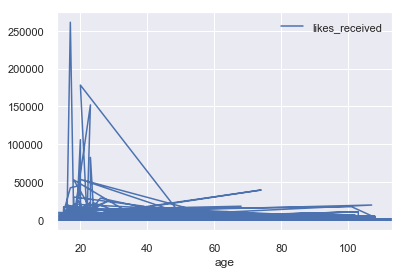

In [61]:
fig,ax = plt.subplots()
fb_cleandf.plot(x='age',y='likes_received',ax=ax)

### Comparing likes Vs likes_received in same graph

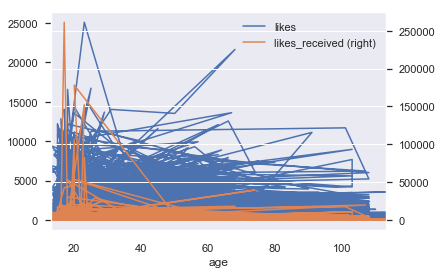

In [62]:
fig, ax = plt.subplots()
fb_cleandf.plot(x = 'age', y = 'likes', ax = ax)
fb_cleandf.plot(x = 'age', y = 'likes_received', ax = ax, secondary_y = True) 

- Users likes ration is greater than likes_received counts.